###Cargar Base de Datos Data_Plantas_Python_2

In [1]:
from pandas.core import indexes
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/sunai/data_plantas_python_2.xlsx', sheet_name= 'Sheet1', header = 0 , usecols = 'A,B,L,M')

Mounted at /content/drive


In [2]:
df.dtypes

id_i                         int64
fecha_im            datetime64[ns]
active_energy_im             int64
active_power_im            float64
dtype: object

###Modelar Base de Datos

In [3]:
cabecera = ('IDinversores', 'FechaHoras', 'ActiveEnergy', 'ActivePower')
df.columns = cabecera
df.dropna(axis = 0, inplace = True) 
df.ActivePower = df.ActivePower.astype(int)
df['FechaHoras'] = df['FechaHoras'].dt.strftime('%-H:%M')
df

,IDinversores,FechaHoras,ActiveEnergy,ActivePower
157,183,6:30,112809400,47
158,184,6:35,100358904,77
159,183,6:35,112809400,91
160,184,6:40,100358904,101
161,183,6:40,112809400,110
...,...,...,...,...
484,184,20:10,100456504,151
485,183,20:10,112923304,187
486,184,20:15,100456504,68
487,183,20:15,112923304,96


###Valor Máximo y Minimo Por IDinversor del Active Energy

In [5]:
df.groupby("IDinversores")
by_Active = df.groupby("IDinversores")
by_Active.describe()

ActiveEnergy                                           \
                    count          mean           std          min   
IDinversores                                                         
183                 166.0  1.128653e+08  43357.642395  112809400.0   
184                 163.0  1.004073e+08  37216.871536  100358904.0   

                                                                 ActivePower  \
                      25%          50%          75%          max       count   
IDinversores                                                                   
183           112820480.0  112863004.0  112911824.0  112923304.0       166.0   
184           100368804.0  100406200.0  100447204.0  100456504.0       163.0   

                                                                        \
                     mean          std   min      25%     50%      75%   
IDinversores                                                             
183           8184.765060  5865.938826  41.0  2901.75  7658.0  12759.5   
184           7128.380368  5202.095568  68.0  2410.50  6556.0  11110.0   

                       
                  max  
IDinversores           
183           20527.0  
184           18553.0

###Valor Máximo y Minimo Total del Active Energy

In [6]:
max = df ['ActiveEnergy']. max()
print ('ActiveEnergy max:', max)

ActiveEnergy max: 112923304


In [7]:
min = df ['ActiveEnergy']. min ()
print ('ActiveEnergy min:', min)

ActiveEnergy min: 100358904


###Suma Total del ActivePower por Día

In [8]:
Total = df['ActivePower'].sum()
print ("ActivePower sum:",Total)


ActivePower sum: 2520597


###Generar Gráfica Lineal

Text(0.5, 1.0, 'Gráfica-Sheet1(NOV-2022)')

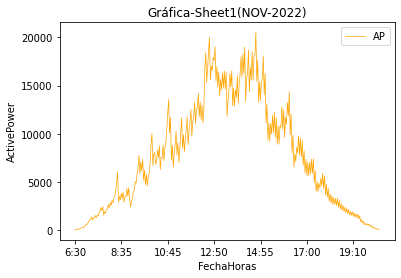

In [9]:
import matplotlib.pyplot as plt
x = df['FechaHoras']
y = df['ActivePower']
df.plot.line(y='ActivePower', x='FechaHoras', c='orange', lw= 0.7, label='AP')
plt.ylabel('ActivePower')
plt.title('Gráfica-Sheet1(NOV-2022)')